In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import itertools
import seaborn as sns

In [2]:
def getsoup(link):
    '''
   Create a BeautifulSoup object from the URL given
    '''
    r = requests.get(link)
    soup = BeautifulSoup(r.text,'lxml')
    return(soup)

In [3]:
def print_list(list):
    '''
    Print a list of tables 
    '''
    for year in list:
        print(year)
    

# Volebni ucast
tabulky volebni ucasti v jednotlivych volbach a letech jsou ulozeny v promennych:
   
   list_scrape_prez - prezidentske volby, roky 2013, 2018
   
   list_scrape_par - volby do parlamentu CR, roky 1996, 1998, 2002, 2006, 2010, 2013, 2017
   
   list_scrape_kraj - volby do krajskych zastupitelstev, roky 2000, 2004, 2008, 2012, 2016, 2020
   
   list_scrape_eu - volby do Evropskeho parlamentu, roky 2004, 2009, 2014, 2019

## Prezidentske

In [4]:
def gettable_prez(soup):
    '''
   Create a table from the BeautifulSoup object given (presidential election format)
    '''
    table=soup.find('table',{'id':'pe41_t1'}).findAll('tr')
    tb= table[2:16]
    return(tb)


In [5]:
def scrapetable_prez(table, year):
    '''
   Create a DataFrame table with regions and respective polls (presidential election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kraj = row.findAll('td')[1].text
        try:
          ucast = float(row.findAll('td',{'class':'cislo'})[5].text.replace(",","."))
        except ValueError:
          ucast = 0
        row1 = pd.Series({"Kraj":kraj,"Účast":ucast})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] = year
    return(df_scraped)

In [6]:

soup_prez_2013 = getsoup('https://volby.cz/pls/prez2013/pe41?xjazyk=CZ&xv=1')
soup_prez_2018 = getsoup('https://volby.cz/pls/prez2018/pe41?xjazyk=CZ&xv=1')

In [7]:
list_soup_prez = [soup_prez_2013, soup_prez_2018]
years = [2013,2018]
i=0
list_table_prez = list_soup_prez
for year in list_soup_prez:
    list_table_prez[i] = gettable_prez(year)
    i = i+1

In [8]:
i=0
list_scrape_prez = list_table_prez
for year in list_table_prez:
    list_scrape_prez[i] = scrapetable_prez(year, years[i])
    i=i+1

In [9]:
print_list(list_scrape_prez)

                   Kraj  Účast  year
0    Hlavní město Praha   65.1  2013
0      Středočeský kraj  63.96  2013
0        Jihočeský kraj  63.63  2013
0         Plzeňský kraj  61.97  2013
0      Karlovarský kraj  52.35  2013
0          Ústecký kraj  52.66  2013
0        Liberecký kraj   59.1  2013
0  Královéhradecký kraj  64.65  2013
0       Pardubický kraj  64.86  2013
0         Kraj Vysočina  66.79  2013
0     Jihomoravský kraj  62.28  2013
0        Olomoucký kraj  60.14  2013
0          Zlínský kraj  62.45  2013
0  Moravskoslezský kraj  56.17  2013
                   Kraj  Účast  year
0    Hlavní město Praha  67.56  2018
0      Středočeský kraj  64.73  2018
0        Jihočeský kraj  63.25  2018
0         Plzeňský kraj  61.44  2018
0      Karlovarský kraj  52.11  2018
0          Ústecký kraj  52.76  2018
0        Liberecký kraj  60.74  2018
0  Královéhradecký kraj  64.19  2018
0       Pardubický kraj  64.98  2018
0         Kraj Vysočina  67.01  2018
0     Jihomoravský kraj  62.56  2018
0

In [10]:
all_prez = pd.concat(list_scrape_prez)

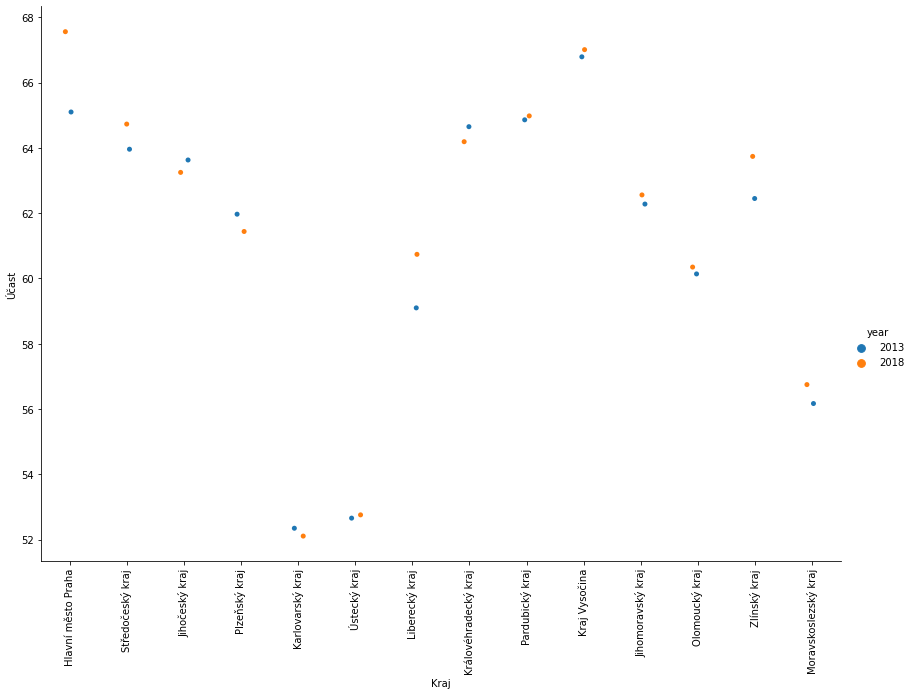

In [11]:
p = sns.catplot(data=all_prez,x='Kraj', y="Účast", hue="year",height=8.27, aspect=11.7/8.27)
p.set_xticklabels(rotation=90)

## Parlamentni

In [12]:
def gettable_par_before1998(soup):
    '''
   Create a table from the BeautifulSoup object given (parlamential election format)
    '''
    table=soup.find('table').findAll('tr')
    tb = table[2:10]
    return(tb)


In [13]:
def gettable_par_after1998(soup):
    '''
   Create a table from the BeautifulSoup object given (parlamential election format)
    '''
    table=soup.find('table').findAll('tr')
    tb = table[2:16]
    return(tb)

In [14]:
def scrapetable_par(table, year):
    '''
   Create a DataFrame table with regions and respective polls (parlamentiar election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kraj = row.findAll('td')[1].text.replace("kraj","").strip()
        kraj = kraj.replace("Kraj", "").strip()
        ucast = float(row.findAll('td')[7].text.replace(",","."))
        row1 = pd.Series({"Kraj":kraj,"Ucast":ucast})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year']= year
    return(df_scraped)

In [15]:
soup_par_1996 = getsoup('https://volby.cz/pls/ps1996/u52')
soup_par_1998 = getsoup('https://volby.cz/pls/ps1998/u52')
soup_par_2002 = getsoup('https://volby.cz/pls/ps2002/ps5?xjazyk=CZ')
soup_par_2006 = getsoup('https://volby.cz/pls/ps2006/ps4?xjazyk=CZ')
soup_par_2010 = getsoup('https://volby.cz/pls/ps2010/ps4?xjazyk=CZ')
soup_par_2013 = getsoup('https://volby.cz/pls/ps2013/ps4?xjazyk=CZ')
soup_par_2017 = getsoup('https://volby.cz/pls/ps2017/ps4?xjazyk=CZ')


In [16]:

soup_par = np.empty(7, dtype=object)
soup_par[0] = soup_par_1996
soup_par[1] = soup_par_1998
soup_par[2] = soup_par_2002
soup_par[3] = soup_par_2006
soup_par[4] = soup_par_2010
soup_par[5] = soup_par_2013
soup_par[6] = soup_par_2017


In [17]:
list_soup_par_before1998 = [soup_par_1996, soup_par_1998]
list_soup_par_after1998 = [soup_par_2002, soup_par_2006, soup_par_2010, soup_par_2013, soup_par_2017]

i=0
list_table_par_before1998 = list_soup_par_before1998
for year in list_soup_par_before1998:
    list_table_par_before1998[i] = gettable_par_before1998(year)
    i = i+1

i=0
list_table_par_after1998 = list_soup_par_after1998
for year in list_soup_par_after1998:
    list_table_par_after1998[i] = gettable_par_after1998(year)
    i = i+1


In [18]:
i=0
years= [1996,1998,2002,2006,2010,2013,2017]
list_scrape_par = [1,2,3,4,5,6,7] #jak to inicializovat lip???
for year in list_table_par_before1998:
    list_scrape_par[i] = scrapetable_par(year, years[i])
    i=i+1
for year in list_table_par_after1998:
    list_scrape_par[i] = scrapetable_par(year,years[i])
    i=i+1

In [19]:
print_list(list_scrape_par)

             Kraj  Ucast  year
0           Praha  69.73  1996
0     Středočeský  78.35  1996
0       Jihočeský  77.67  1996
0     Západočeský  74.56  1996
0     Severočeský  72.79  1996
0    Východočeský  80.44  1996
0    Jihomoravský  79.26  1996
0  Severomoravský   76.8  1996
             Kraj  Ucast  year
0           Praha  71.62  1998
0     Středočeský  76.38  1998
0       Jihočeský  75.24  1998
0     Západočeský  72.19  1998
0     Severočeský  69.89  1998
0    Východočeský  77.64  1998
0    Jihomoravský  76.06  1998
0  Severomoravský  72.72  1998
                 Kraj  Ucast  year
0  Hlavní město Praha  59.98  2002
0         Středočeský  58.78  2002
0           Jihočeský  58.11  2002
0            Plzeňský     58  2002
0         Karlovarský  50.17  2002
0             Ústecký  50.65  2002
0           Liberecký  55.83  2002
0     Královéhradecký  60.84  2002
0          Pardubický  61.14  2002
0            Vysočina  62.45  2002
0        Jihomoravský  60.03  2002
0           Olomoucký 

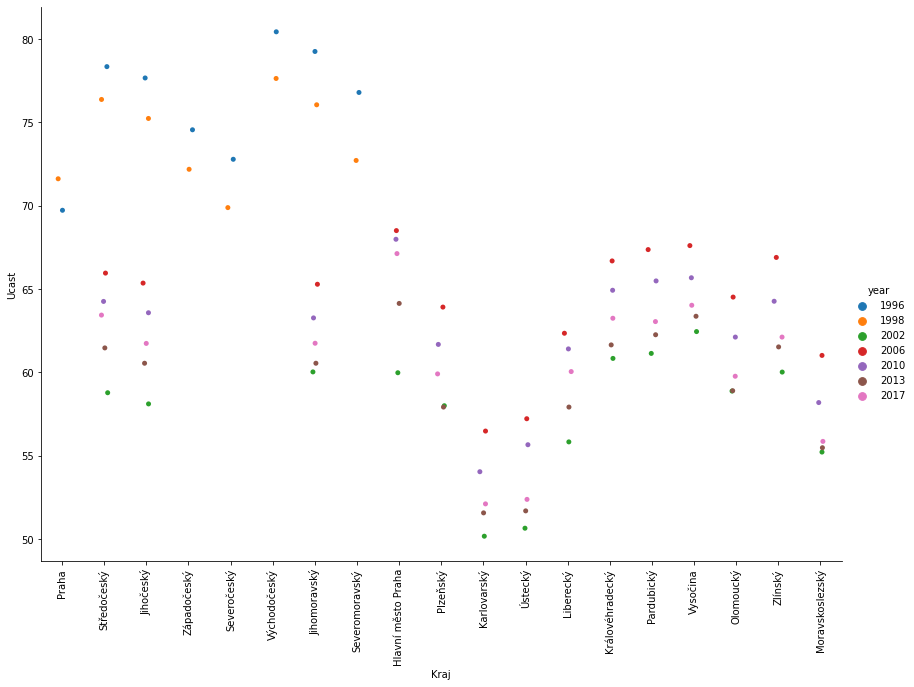

In [20]:
all_par = pd.concat(list_scrape_par)
pa = sns.catplot(data=all_par,x='Kraj', y="Ucast", hue="year",height=8.27, aspect=11.7/8.27)
pa.set_xticklabels(rotation=90)

## Senatni - asi nedava uplne smysl, tim, ze nejsou plosne

In [21]:
soup_sen_1996 = getsoup('https://volby.cz/pls/senat/se31?xjazyk=CZ&xdatum=19961116&xv=1')
soup_sen_1998 = getsoup('https://volby.cz/pls/senat/se31?xjazyk=CZ&xdatum=19981114&xv=1')

## Krajska zastupitelstva

In [22]:
def gettable_kraj(soup):
    '''
   Create a table from the BeautifulSoup object given (regional election format)
   There are only 13 regions because Prague is not counted.
    '''
    table=soup.find('table').findAll('tr')
    tb = table[2:15]
    return(tb)

In [23]:
def scrapetable_kraj(table,year):
    '''
   Create a DataFrame table with regions and respective polls (regional election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kraj = row.findAll('td')[1].text

        ucast = float(row.findAll('td')[7].text.replace(",","."))
        print(ucast)
        row1 = pd.Series({"Kraj":kraj,"Ucast":ucast})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] =  year
    return(df_scraped)

In [24]:
soup_kraj_2000 = getsoup('https://volby.cz/pls/kz2000/kz4?xjazyk=CZ&xdatum=20001112')
soup_kraj_2004 = getsoup('https://volby.cz/pls/kz2004/kz4?xjazyk=CZ&xdatum=20041105')
soup_kraj_2008 = getsoup('https://volby.cz/pls/kz2008/kz4?xjazyk=CZ&xdatum=20081017')
soup_kraj_2012 = getsoup('https://volby.cz/pls/kz2012/kz4?xjazyk=CZ&xdatum=20121012')
soup_kraj_2016 = getsoup('https://volby.cz/pls/kz2016/kz4?xjazyk=CZ&xdatum=20161007')
soup_kraj_2020 = getsoup('https://volby.cz/pls/kz2020/kz4?xjazyk=CZ')

In [25]:
list_soup_kraj = (soup_kraj_2000, soup_kraj_2004, soup_kraj_2008, soup_kraj_2012, soup_kraj_2016, soup_kraj_2020)
years = [2000,2004,2008,2012,2016,2020]
i=0
list_table_kraj = [1, 2, 3, 4, 5, 6]
for year in list_soup_kraj:
    list_table_kraj[i] = gettable_kraj(year)
    i = i+1
   

In [26]:
i=0
list_scrape_kraj = [1,2,3,4,5,6]
for year in list_table_kraj:
    list_scrape_kraj[i] = scrapetable_kraj(year,years[i])
    i=i+1

32.77
34.13
35.55
28.44
29.68
33.07
34.74
36.46
35.86
34.93
34.19
36.07
32.24
30.73
30.45
31.34
24.99
25.37
30.83
32.56
32.6
31.82
29.71
28.44
30.63
27.55
42.14
40.78
40.28
35.01
37.44
38.08
41.72
42.61
44.88
41.05
38.5
41.13
38.6
36.45
38.59
38.21
31.57
33.94
38.55
38.43
39.47
41.05
37.76
35.67
40.34
33.17
34.76
36.31
35.74
30.23
28.94
35.91
37.33
36.8
37.34
36.84
33.2
38.5
30.58
40.66
39.51
38.8
34.94
31.3
40.41
41.01
40.87
39.65
38.82
37.29
41.19
32.71


In [27]:
print_list(list_scrape_kraj)

                     Kraj  Ucast  year
0       Středočeský kraj   32.77  2000
0       Budějovický kraj   34.13  2000
0          Plzeňský kraj   35.55  2000
0       Karlovarský kraj   28.44  2000
0           Ústecký kraj   29.68  2000
0         Liberecký kraj   33.07  2000
0   Královéhradecký kraj   34.74  2000
0        Pardubický kraj   36.46  2000
0         Jihlavský kraj   35.86  2000
0          Brněnský kraj   34.93  2000
0         Olomoucký kraj   34.19  2000
0           Zlínský kraj   36.07  2000
0         Ostravský kraj   32.24  2000
                     Kraj  Ucast  year
0       Středočeský kraj   30.73  2004
0         Jihočeský kraj   30.45  2004
0          Plzeňský kraj   31.34  2004
0       Karlovarský kraj   24.99  2004
0           Ústecký kraj   25.37  2004
0         Liberecký kraj   30.83  2004
0   Královéhradecký kraj   32.56  2004
0        Pardubický kraj    32.6  2004
0               Vysočina   31.82  2004
0      Jihomoravský kraj   29.71  2004
0         Olomoucký kraj 

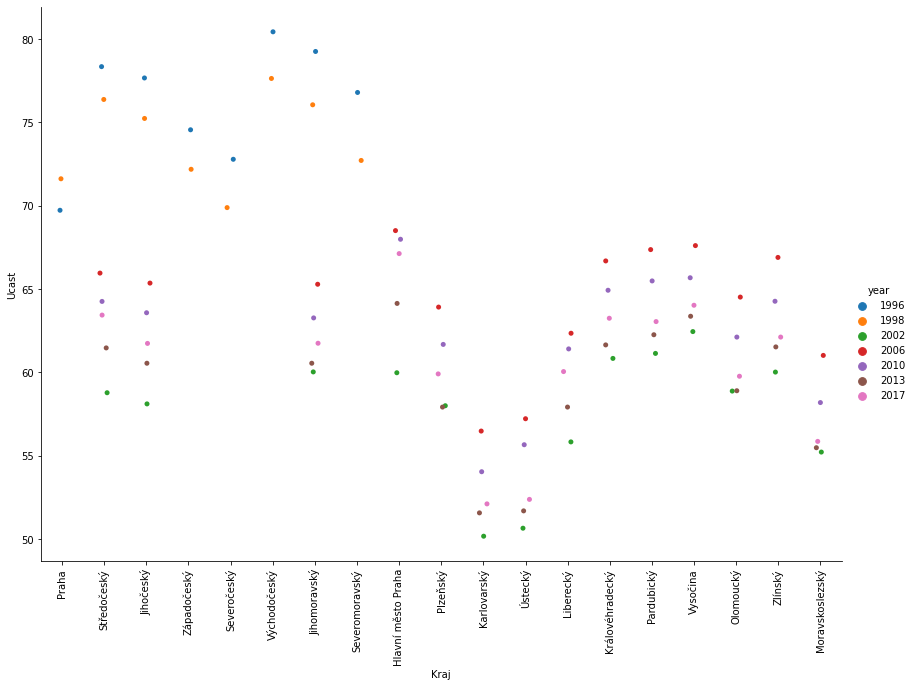

In [28]:
all_kraj = pd.concat(list_scrape_kraj)
kr = sns.catplot(data=all_par,x='Kraj', y="Ucast", hue="year",height=8.27, aspect=11.7/8.27)
kr.set_xticklabels(rotation=90)

## Evropsky parlament

In [29]:
def gettable_eu(soup):
    '''
   Create a table from the BeautifulSoup object given (european parliament election format)
    '''
    table=soup.find('table').findAll('tr')
    tb = table[2:16]
    return(tb)

In [30]:
def scrapetable_eu(table,year):
    '''
   Create a DataFrame table with regions and respective polls (european parliament election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kraj = row.findAll('th')[0].text
        try:
          ucast = float(row.findAll('td')[6].text.replace(",","."))
        except ValueError:
          ucast = 0

        row1 = pd.Series({"Kraj":kraj,"Účast":ucast})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] = year
    return(df_scraped)

In [31]:
soup_eu_2004 = getsoup('https://volby.cz/pls/ep2004/ep121?xjazyk=CZ')
soup_eu_2009 = getsoup('https://volby.cz/pls/ep2009/ep121?xjazyk=CZ')
soup_eu_2014 = getsoup('https://volby.cz/pls/ep2014/ep121?xjazyk=CZ')
soup_eu_2019 = getsoup('https://volby.cz/pls/ep2019/ep121?xjazyk=CZ')

In [32]:
list_soup_eu = (soup_eu_2004, soup_eu_2009, soup_eu_2014, soup_eu_2019)
years = [2004,2009,2014,2019]
i=0
list_table_eu = [1, 2, 3, 4]
for year in list_soup_eu:
    list_table_eu[i] = gettable_eu(year)
    i = i+1

In [33]:
i=0
list_scrape_eu = [1, 2, 3, 4]
for year in list_table_eu:
    list_scrape_eu[i] = scrapetable_eu(year, years[i])
    i=i+1

In [34]:
print_list(list_scrape_eu)

                   Kraj  Účast  year
0    Hlavní město Praha  34.61  2004
0      Středočeský kraj  29.33  2004
0        Jihočeský kraj  27.29  2004
0         Plzeňský kraj  28.96  2004
0      Karlovarský kraj  23.21  2004
0          Ústecký kraj  23.11  2004
0        Liberecký kraj  26.96  2004
0  Královéhradecký kraj  30.23  2004
0       Pardubický kraj   29.4  2004
0              Vysočina  29.05  2004
0     Jihomoravský kraj  29.66  2004
0        Olomoucký kraj  27.23  2004
0          Zlínský kraj  29.04  2004
0  Moravskoslezský kraj  24.04  2004
                   Kraj  Účast  year
0    Hlavní město Praha  35.73  2009
0      Středočeský kraj  29.35  2009
0        Jihočeský kraj  27.69  2009
0         Plzeňský kraj  28.09  2009
0      Karlovarský kraj  21.75  2009
0          Ústecký kraj  22.51  2009
0        Liberecký kraj  26.65  2009
0  Královéhradecký kraj  29.19  2009
0       Pardubický kraj  28.97  2009
0              Vysočina  28.86  2009
0     Jihomoravský kraj  28.64  2009
0

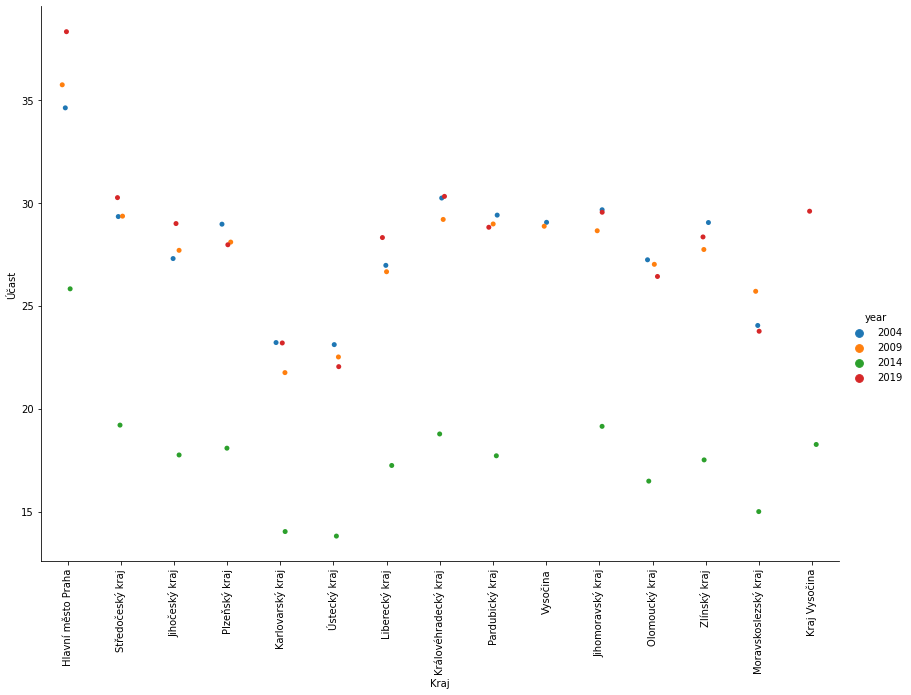

In [35]:
all_eu = pd.concat(list_scrape_eu)
kr = sns.catplot(data=all_eu,x='Kraj', y="Účast", hue="year",height=8.27, aspect=11.7/8.27)
kr.set_xticklabels(rotation=90)

# Vysledky voleb

## Prezidentske

In [36]:
def getresults_prez(soup):
    '''
   Create a table from the BeautifulSoup object given (presidential election format)
    '''
    table=soup.find('table', id="pe2_t2").findAll('tr')
    tb = table[2:16]
    return(tb)

In [37]:
def scraperesults_prez(table,year):
    '''
   Create a DataFrame table with regions and respective polls (presidential election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        kandidat = row.findAll('td')[1].text
        try:
          vysledek = float(row.findAll('td')[5].text.replace(",","."))
        except:
          vysledek = 0

        row1 = pd.Series({"Kandidat":kandidat,"Vysledek":vysledek})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] = year
    return(df_scraped)

In [38]:
soup_prez_res_2013 = getsoup('https://volby.cz/pls/prez2013/pe2?xjazyk=CZ')
soup_prez_res_2018 = getsoup('https://volby.cz/pls/prez2018/pe2?xjazyk=CZ')

In [39]:
list_soup_prez_res = (soup_prez_res_2013, soup_prez_res_2018)

i=0
list_tab_res_prez = [1, 2]
for year in list_soup_prez_res:
    list_tab_res_prez[i] = getresults_prez(year)
    i = i+1

In [40]:
i=0
years = [2013,2018]
list_res_prez = [1, 2]
for year in list_tab_res_prez:
    list_res_prez[i] = scraperesults_prez(year, years[i])
    i=i+1

In [41]:
print_list(list_res_prez)

                     Kandidat Vysledek  year
0   Roithová Zuzana MUDr. MBA     4.95  2013
0       Fischer Jan Ing. CSc.    16.35  2013
0        Bobošíková Jana Ing.     2.39  2013
0           Fischerová Taťana     3.23  2013
0       Sobotka Přemysl MUDr.     2.46  2013
0            Zeman Miloš Ing.    24.21  2013
0  Franz Vladimír Prof. JUDr.     6.84  2013
0             Dienstbier Jiří    16.12  2013
0         Schwarzenberg Karel     23.4  2013
                                  Kandidat Vysledek  year
0                     Topolánek Mirek Ing.      4.3  2018
0                Horáček Michal Mgr. Ph.D.     9.18  2018
0                       Fischer Pavel Mgr.    10.23  2018
0                         Hynek Jiří RNDr.     1.23  2018
0                         Hannig Petr Mgr.     0.56  2018
0        Kulhánek Vratislav Ing. Dr. h. c.     0.47  2018
0                         Zeman Miloš Ing.    38.56  2018
0             Hilšer Marek MUDr. Bc. Ph.D.     8.83  2018
0  Drahoš Jiří prof. Ing. Dr

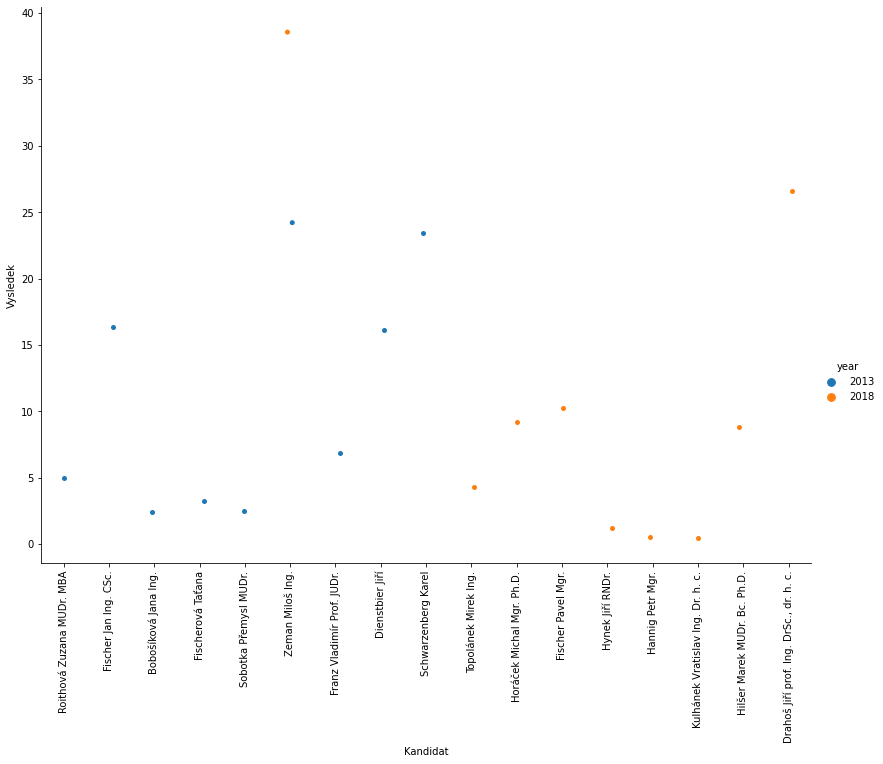

In [42]:
all_prez = pd.concat(list_res_prez)
g = sns.catplot(data=all_prez,x='Kandidat', y="Vysledek", hue="year",height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)

## Parlamentni

In [43]:
def getresults_par_before2002(soup):
    '''
   Create a table from the BeautifulSoup object given (parliament election format)
    '''
    table=soup.findAll('table')[1].findAll('tr')
    tb = table[2:20]
    return(tb)

In [44]:
def getresults_par_after2002(soup):
    '''
   Create a table from the BeautifulSoup object given (parliament election format)
    '''
    table=soup.findAll('table')[2].findAll('tr')
    tb = table[2:20]
    return(tb)

In [45]:
def scraperesults_par_before2002(table,year):
    '''
   Create a DataFrame table with regions and respective polls (parliament election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table:
        strana1 = row.findAll('td')[1].text
        vysledek1 = float(row.findAll('td')[3].text.replace(",","."))
        strana2 = row.findAll('td')[6].text
        vysledek2 = float(row.findAll('td')[8].text.replace(",","."))
        row1 = pd.Series({"Strana":strana1,"Vysledek":vysledek1})
        row2 = pd.Series({"Strana":strana2,"Vysledek":vysledek2})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
        df_scraped = pd.concat([df_scraped, row2], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year']=year
    return(df_scraped)

In [46]:
def scraperesults_par_after2002(table1, table2,year):
    '''
   Create a DataFrame table with regions and respective polls (parliament election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table1:
        strana1 = row.findAll('td')[1].text
        try:
          vysledek1 = float(row.findAll('td')[3].text.replace(",","."))
        except ValueError:
          vysledek1 = 0
        row1 = pd.Series({"Strana":strana1,"Vysledek":vysledek1})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    for row in table2:
        strana2 = row.findAll('td')[1].text
        try:
          vysledek2 = float(row.findAll('td')[3].text.replace(",","."))
        except ValueError:
          vysledek2 = 0
        row2 = pd.Series({"Strana":strana2,"Vysledek":vysledek2})  
        df_scraped = pd.concat([df_scraped, row2], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] =  year
    return(df_scraped)

In [47]:
soup_par_res_1996 = getsoup('https://volby.cz/pls/ps1996/u4')
soup_par_res_1998 = getsoup('https://volby.cz/pls/ps1998/u4')
soup_par_res_2002 = getsoup('https://volby.cz/pls/ps2002/ps2?xjazyk=CZ')
soup_par_res_2006 = getsoup('https://volby.cz/pls/ps2006/ps2?xjazyk=CZ')
soup_par_res_2010 = getsoup('https://volby.cz/pls/ps2010/ps2?xjazyk=CZ')
soup_par_res_2013 = getsoup('https://volby.cz/pls/ps2013/ps2?xjazyk=CZ')
soup_par_res_2017 = getsoup('https://volby.cz/pls/ps2017nss/ps2?xjazyk=CZ')

In [48]:
list_soup_par_res1 = [soup_par_res_1996,soup_par_res_1998,soup_par_res_2002]

i=0
list_tab_res_par1 = [1, 2, 3]
for year in list_soup_par_res1:
    list_tab_res_par1[i] = getresults_par_before2002(year)
    i = i+1

In [49]:
list_soup_par_res2 = [soup_par_res_2006, soup_par_res_2010, soup_par_res_2013, soup_par_res_2017]

i=0
list_tab_res_par12 = [1, 2, 3, 4]
for year in list_soup_par_res2:
    list_tab_res_par12[i] = getresults_par_before2002(year)
    i = i+1
    
i=0
list_tab_res_par22 = [1, 2, 3, 4]
for year in list_soup_par_res2:
    list_tab_res_par22[i] = getresults_par_after2002(year)
    i = i+1

In [50]:
i=0
years = [1996,1998,2002,2006,2010,2013,2017]
list_res_par = [1, 2, 3, 4, 5, 6, 7]
for year in list_tab_res_par1:
    list_res_par[i] = scraperesults_par_before2002(year, years[i])
    i=i+1
    

for j in range(4):
    list_res_par[i] = scraperesults_par_after2002(list_tab_res_par12[j], list_tab_res_par22[j], years[i])
    i=i+1

In [51]:
print_list(list_res_par)


                           Strana Vysledek  year
0         Svobodní demokraté-LSNS     2.05  1996
0     Důchodci za životní jistoty     3.09  1996
0   Česká str.sociál.demokratická    26.44  1996
0      Strana demokratické levice     0.13  1996
0    Občanská demokratická strana    29.62  1996
0       Českomoravská unie středu     0.45  1996
0                      Pravý blok        0  1996
0                   Česká pravice     0.05  1996
0                       Nezávislí      0.5  1996
0  Komunistická str.Čech a Moravy    10.33  1996
0  Mor.nár.str.-Hn.slezskom.sjed.     0.27  1996
0                 Strana zelených        0  1996
0               Demokratická unie      2.8  1996
0  Sdruž.pro rep.-Republ.str.Čsl.     8.01  1996
0   Občanská demokratická aliance     6.36  1996
0                       Levý blok      1.4  1996
0    Strana českosloven.komunistů        0  1996
0  Hn.samosp.M.aSl.-Mor.nár.sjed.     0.42  1996
0    Křesť.a dem.unie-Čs.str.lid.     8.08  1996
0         Celostátní

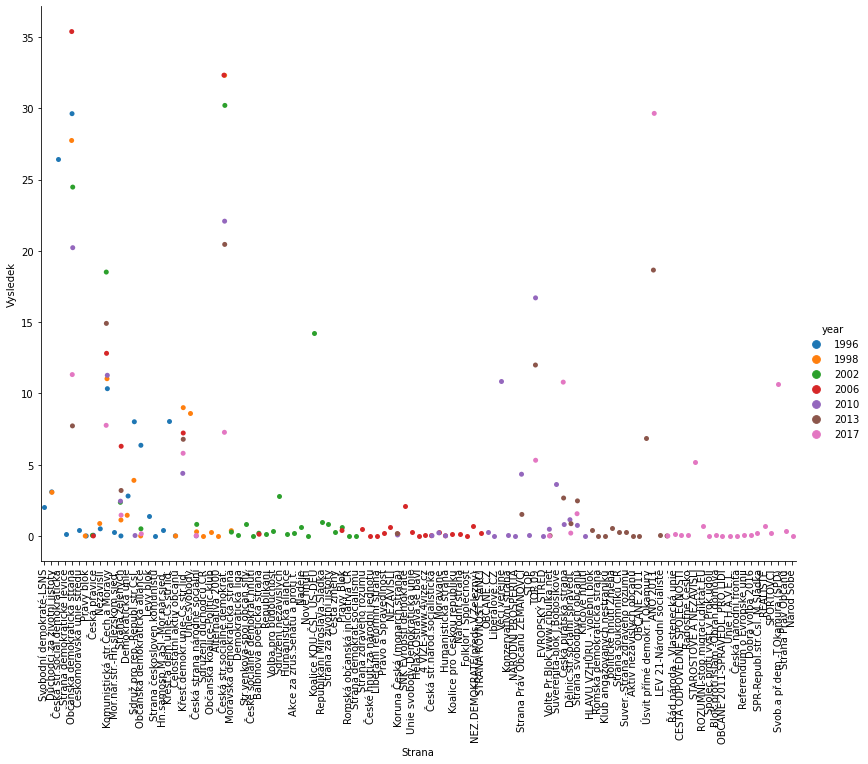

In [52]:
all_par = pd.concat(list_res_par)
g = sns.catplot(data=all_par,x='Strana', y="Vysledek", hue="year",height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)

## Evropske

In [53]:
def getresults_eu1(soup):
    '''
   Create a table from the BeautifulSoup object given (european election format)
    '''
    table=soup.findAll('table')[1].findAll('tr')
    tb = table[2:30]
    return(tb)

In [54]:
def getresults_eu2(soup):
    '''
   Create a table from the BeautifulSoup object given (european election format)
    '''
    table=soup.findAll('table')[2].findAll('tr')
    tb = table[2:20]
    return(tb)

In [55]:
def scraperesults_eu1(table1, table2,year):
    '''
   Create a DataFrame table with regions and respective polls (european parliament election format)
    '''
    df_scraped = pd.DataFrame()
    for row in table1:
        strana1 = row.findAll('td')[1].text
        try:
          vysledek1 = float(row.findAll('td')[3].text.replace(",","."))
        except ValueError:
          vysledek1 = 0

        row1 = pd.Series({"Strana":strana1,"Vysledek":vysledek1})
        df_scraped = pd.concat([df_scraped, row1], axis=1)
    for row in table2:
        strana2 = row.findAll('td')[1].text
        try:
          vysledek2 = float(row.findAll('td')[3].text.replace(",","."))
        except ValueError:
          vysledek2 = 0
        row2 = pd.Series({"Strana":strana2,"Vysledek":vysledek2})  
        df_scraped = pd.concat([df_scraped, row2], axis=1)
    df_scraped = df_scraped.T
    df_scraped['year'] = year
    return(df_scraped)

In [56]:
soup_eu_res_2004 = getsoup('https://volby.cz/pls/ep2004/ep11?xjazyk=CZ')
soup_eu_res_2009 = getsoup('https://volby.cz/pls/ep2009/ep11?xjazyk=CZ')
soup_eu_res_2014 = getsoup('https://volby.cz/pls/ep2014/ep11?xjazyk=CZ')
soup_eu_res_2019 = getsoup('https://volby.cz/pls/ep2019/ep11?xjazyk=CZ')

In [57]:
list_soup_eu = [soup_eu_res_2004, soup_eu_res_2009, soup_eu_res_2014, soup_eu_res_2019]

i=0
list_tab_res_eu12 = [1, 2, 3, 4]
for year in list_soup_eu:
    list_tab_res_eu12[i] = getresults_eu1(year)
    i = i+1
    
i=0
list_tab_res_eu22 = [1, 2, 3, 4]
for year in list_soup_eu:
    list_tab_res_eu22[i] = getresults_eu2(year)
    i = i+1

In [58]:

list_res_eu = [1, 2, 3, 4]
years = [2004,2009,2014,2019]
for j in range(4):
    list_res_eu[j] = scraperesults_eu1(list_tab_res_eu12[j], list_tab_res_eu22[j], years[j])

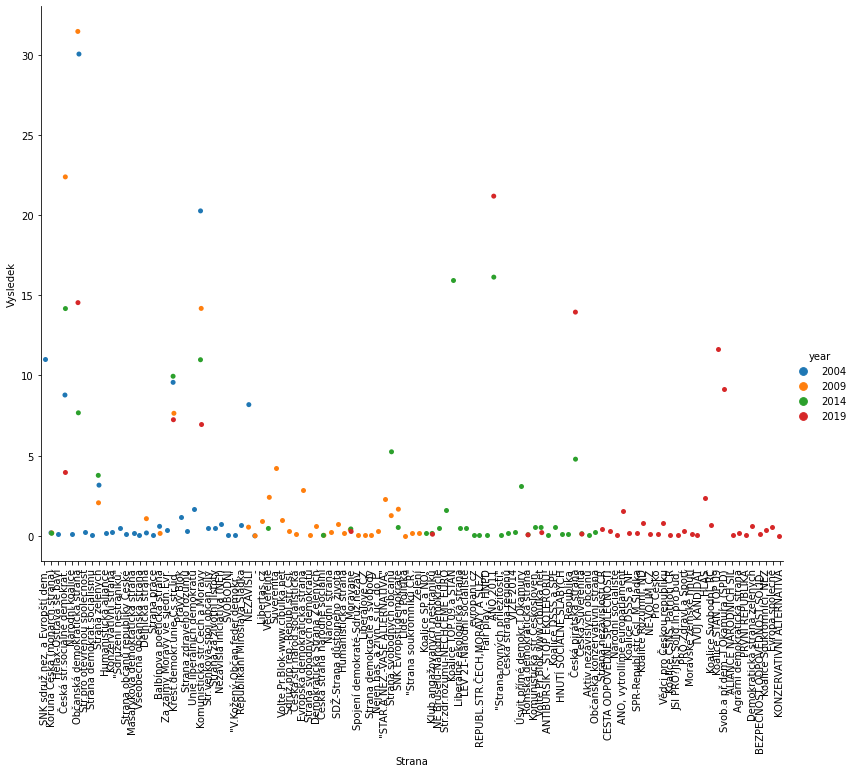

In [59]:
all_eu = pd.concat(list_res_eu)
g = sns.catplot(data=all_eu,x='Strana', y="Vysledek", hue="year",height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=90)